In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [3]:
dataset = pd.read_csv('/Users/ytuo/Desktop/2023 FALL/ece-9063/House-Pricing/train.csv')
sample_submission = pd.read_csv('/Users/ytuo/Desktop/2023 FALL/ece-9063/House-Pricing/sample_submission .csv')

In [4]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

MSSubClass, LotFrontage,OverallQual, OverallCond, YearBuilt, YearRemodAdd, GarageArea

# Data Preprocessing

In [17]:
# Handle missing values and feature engineering for data_train and data_test

# Split the data_train dataset into features and target variable
feature_columns = ['MSSubClass', 'LotFrontage','LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageArea']
label_column = ['SalePrice']

In [18]:
features = dataset[feature_columns]
label = dataset[label_column]

# Model Selection and Splitting Data

In [19]:
features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageArea
0,60,65.0,8450,7,5,2003,2003,548
1,20,80.0,9600,6,8,1976,1976,460
2,60,68.0,11250,7,5,2001,2002,608
3,70,60.0,9550,7,5,1915,1970,642
4,60,84.0,14260,8,5,2000,2000,836


In [20]:
label.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [21]:
X = features.values
Y = label.values

In [22]:

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 0) 


In [23]:


# Initialize and train the models
# Define the imputer
imputer = SimpleImputer(strategy='median')
# Create a pipeline that imputes missing values and fits the  model
regressor = make_pipeline(imputer, LinearRegression())

# Fit the model
regressor.fit(X_train, Y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('linearregression', LinearRegression())])

# Model Evaluation

In [24]:
X_test

array([[2.0000e+01,        nan, 3.2668e+04, ..., 1.9570e+03, 1.9750e+03,
        4.8400e+02],
       [5.0000e+01, 7.9000e+01, 9.4900e+03, ..., 1.9410e+03, 1.9500e+03,
        2.4000e+02],
       [5.0000e+01,        nan, 7.0150e+03, ..., 1.9500e+03, 1.9500e+03,
        3.5200e+02],
       ...,
       [5.0000e+01, 6.0000e+01, 8.5200e+03, ..., 1.9160e+03, 1.9500e+03,
        2.1600e+02],
       [3.0000e+01, 5.0000e+01, 5.3300e+03, ..., 1.9400e+03, 1.9500e+03,
        0.0000e+00],
       [7.5000e+01, 6.0000e+01, 7.2000e+03, ..., 1.9200e+03, 1.9960e+03,
        2.8800e+02]])

In [25]:
Y_pred = regressor.predict(X_test)

In [26]:
Y_pred

array([[196123.36860488],
       [148693.6793181 ],
       [115861.62205038],
       [214114.78565476],
       [121504.02432696],
       [123134.61256313],
       [277686.08773083],
       [161927.54329275],
       [377646.57973213],
       [206078.76646977],
       [200934.83076707],
       [146314.44139175],
       [218451.44993622],
       [117147.70183319],
       [144641.78794271],
       [121151.54714526],
       [233740.91729915],
       [ 75069.36153296],
       [136180.53673087],
       [173547.91220154],
       [149665.68919989],
       [170837.77148431],
       [148792.54072261],
       [167613.41404736],
       [181309.67747159],
       [259420.27232162],
       [165241.81960681],
       [ 33939.50742336],
       [322187.68351922],
       [120937.43351989],
       [172423.87629386],
       [210943.6953787 ],
       [171252.4237533 ],
       [289082.19649659],
       [291621.67110149],
       [218051.7735482 ],
       [280567.71727256],
       [139328.64381541],
       [2315

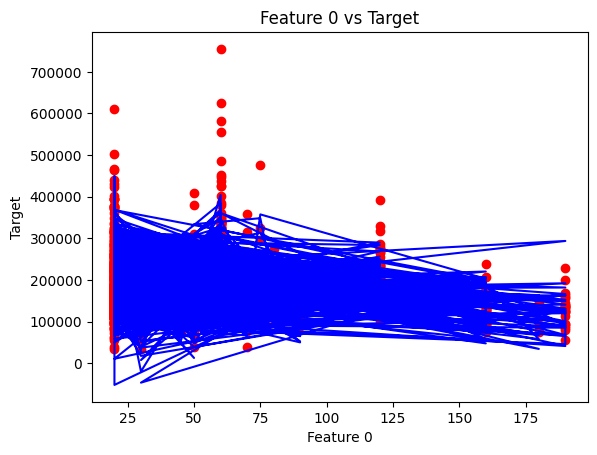

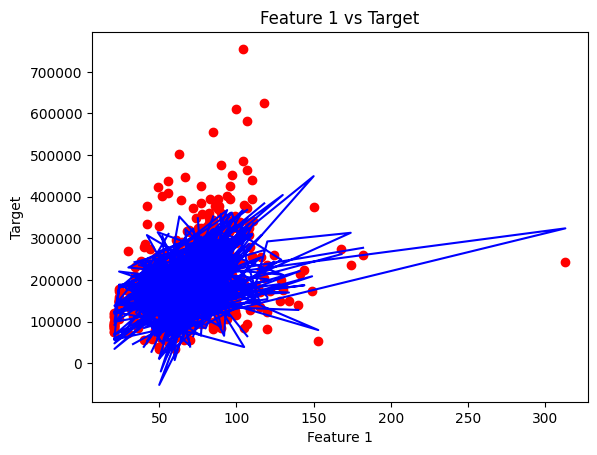

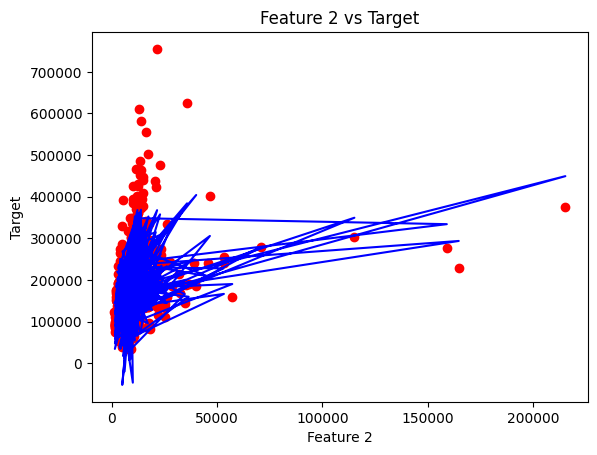

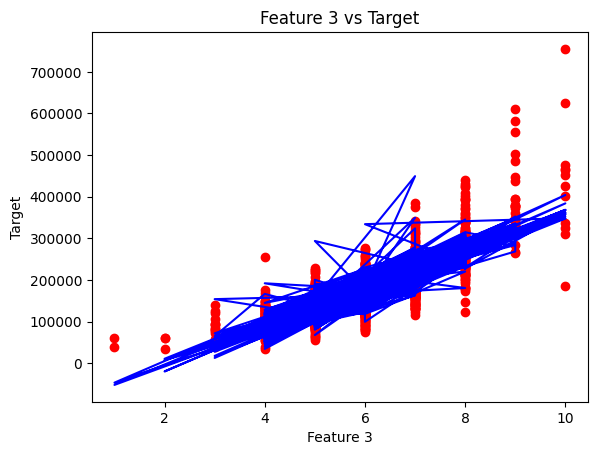

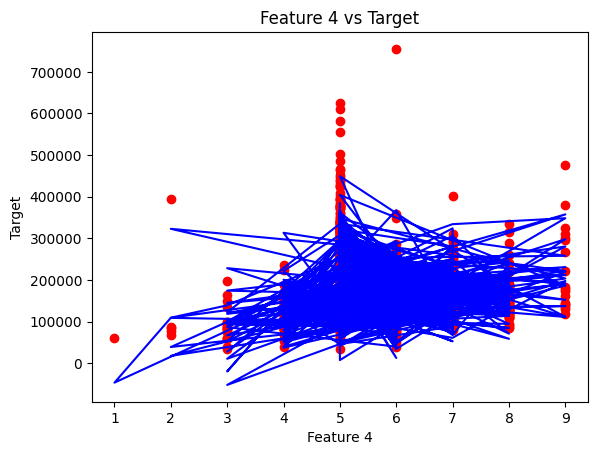

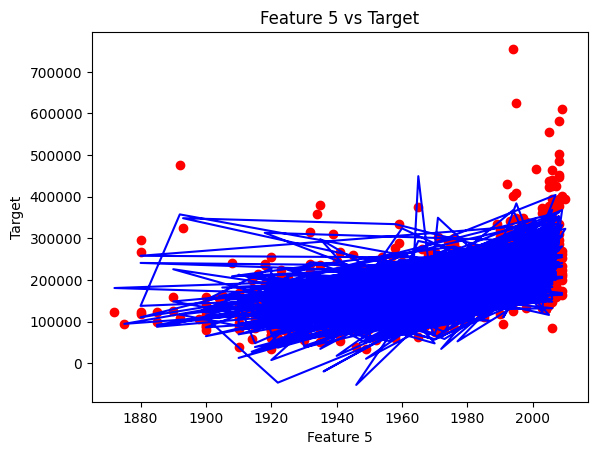

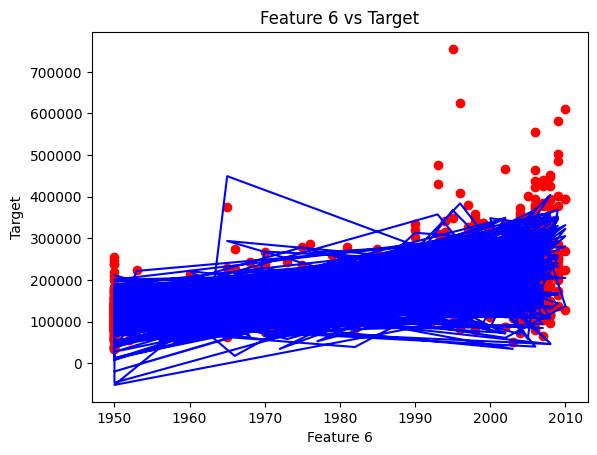

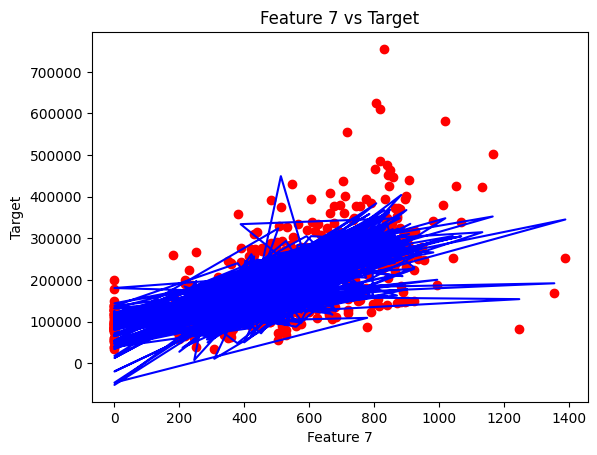

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming X_train is a numpy array and not a DataFrame
for i in range(X_train.shape[1]):
    plt.figure(i)
    plt.scatter(X_train[:, i], Y_train, color='red')
    plt.plot(X_train[:, i], regressor.predict(X_train), color='blue')
    plt.title(f'Feature {i} vs Target')
    plt.xlabel(f'Feature {i}')
    plt.ylabel('Target')
    plt.show()


# Model Evaluation

In [28]:
# Linear Regression
mae_lr = mean_absolute_error(Y_test, Y_pred)
mse_lr = mean_squared_error(Y_test, Y_pred)
rmse_lr = math.sqrt(mse_lr)
print("Linear Regression - MAE: {}, RMSE: {}".format(mae_lr, rmse_lr))

Linear Regression - MAE: 30364.58284193113, RMSE: 50118.058428508804
